In [1]:
import torch
import torchvision.transforms as transforms
import torch.utils.data as data
import os
import random
import numpy as np
from PIL import Image
from file_utils import read_file_in_dir
import matplotlib.pyplot as plt


IMG_EXTENSIONS = [
    '.jpg', '.JPG', '.jpeg', '.JPEG',
    '.png', '.PNG', '.ppm', '.PPM', '.bmp', '.BMP',
    '.tif', '.TIF', '.tiff', '.TIFF',
]


class CycleDataset(data.Dataset):
    
    def is_image_file(self, fname):
        return any(fname.endswith(extension) for extension in IMG_EXTENSIONS)
    def generate_index(self, path):
        images = []
        assert os.path.isdir(path)
        for root, _, fnames in sorted(os.walk(path)):
            for fname in fnames:
                if self.is_image_file(fname):
                    path = os.path.join(root, fname)
                    images.append(path)
        return images
    
    def __init__(self, config, mode):
        self.dir_A = os.path.join(config['dataset']['data_location'], mode + 'A')  # create a path '/path/to/data/trainA'
        self.dir_B = os.path.join(config['dataset']['data_location'], mode + 'B')  # create a path '/path/to/data/trainB'
        
        self.A_paths = sorted(self.generate_index(self.dir_A))
        self.B_paths = sorted(self.generate_index(self.dir_B))
        
        self.A_size = len(self.A_paths)
        self.B_size = len(self.B_paths)
        self.transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
    def __getitem__(self, index):
        A_path = self.A_paths[index % self.A_size]
        B_path = self.B_paths[random.randint(0, self.B_size -1)]
        A_img = Image.open(A_path).convert('RGB')
        A_img =self.transform(A_img)
        B_img = Image.open(B_path).convert('RGB')
        B_img = self.transform(B_img)
        
        return {'A': A_img, 'B': B_img, 'A_path': A_path, 'B_path': B_path}
    def __len__(self):
        return max(self.A_size, self.B_size)

-1.0 -0.058736105 0.41267532


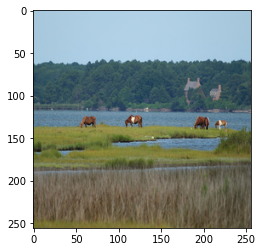

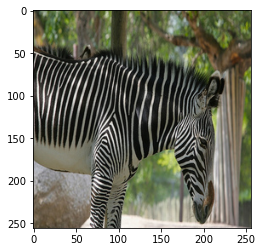

{'A': tensor([[[ 0.9843,  0.9843,  0.9843,  ...,  0.9843,  0.9843,  0.9843],
         [ 0.9843,  0.9843,  0.9843,  ...,  0.9843,  0.9843,  0.9843],
         [ 0.9843,  0.9843,  0.9843,  ...,  0.9843,  0.9843,  0.9843],
         ...,
         [-0.6549, -0.6392, -0.6078,  ..., -0.2078, -0.1765, -0.1529],
         [-0.6549, -0.6157, -0.6314,  ..., -0.2000, -0.1608, -0.1529],
         [-0.6549, -0.6471, -0.6235,  ..., -0.1843, -0.1451, -0.1451]],

        [[ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
         [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
         [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
         ...,
         [-0.5843, -0.5922, -0.5608,  ..., -0.4745, -0.4431, -0.4118],
         [-0.5843, -0.5686, -0.5843,  ..., -0.4902, -0.4510, -0.4196],
         [-0.5843, -0.5765, -0.5765,  ..., -0.4824, -0.4431, -0.4353]],

        [[ 0.9608,  0.9608,  0.9608,  ...,  0.9608,  0.9608,  0.9608],
         [ 0.9608,  0.9608,  0.9608,  .

In [8]:
if __name__ == "__main__" :
    config = read_file_in_dir('./', 'parameter.json')
    data = CycleDataset(config, "train")
    real_a = data[1]['A'].cpu().float().numpy()
    print(real_a.min(), np.mean(real_a), np.std(real_a))
    real_a = (np.transpose(real_a, (1,2,0)) + 1)/2.0 * 255.0
    real_a = real_a.astype(int)
    plt.imshow(real_a)
    plt.show()
    real_b = data[0]['B'].cpu().float().numpy()
    real_b = (np.transpose(real_b, (1,2,0)) + 1)/2.0 * 255.0
    real_b = real_b.astype(int)
    plt.imshow(real_b)
    plt.show()
    print(data[0])